### Gradient descent
- optimization algo to find optimal solution to many problems
- start with random parms (random initiation), then tweak them iteretively, at each step evaluate cost function, move in the direction to minimize the cost function (descent), until convergest to min
- size if the descent step is called "learning_rate" - if too small it will take forever to descent, if too big, it will jump acoss the valley to the other side, sometimes higher...
- if cost function if a "bowl" then it's easy to descent, but most are irregular planes with local min, or flat valleys, where we can stuck and never reach global min
- in order to have the cost function "bowl" as uniform as possible across dimentions - always scale with StandardScaler
- more varriables/dimentions- bigger Parameter scale -> longe to converge
- in the case of Linear Regerssion the cost function if convex to it's easy to descent 

### Batch Gradient descent
- uses all Training data to estimate gradient vector:
    -  every change in cost function due to change in parm value is a "partial derivative"
    - "gradient vector" is a matrix of all partial derivatives for each step
- because it uses all Training data- it's slow for a large parameter space (but still much faster than Normal Equestions or SVD decomposition)
- at each step, if gradient vector points uphill, we subtract it from this steps parms space: next step parm space  = this step parm space - learning_rate * (gradient vector)
- too low learning_rate - will take for ever to find the solution
- too high learning_rate - will jump, risk local min instead of global
- Grid Search a way to find the right learning_Rate

- how many iteration to set up to - best way is to make it large but to interupt it when the gradient is getting really small e.g. < "tolerance" setting

In [11]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "training_linear_models"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [23]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)
X_b = np.c_[np.ones((100, 1)), X]  # add x0 = 1 to each instance

eta = 0.1  # learning rate
n_iterations = 1000
m = 100

theta = np.random.randn(2,1)  # random initialization

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

print ('theta same as Normal Equations!')
theta

theta same as Normal Equations!


array([[4.17795097],
       [2.87092976]])

In [24]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]  # add x0 = 1 to each instance
X_new_b.dot(theta)

array([[4.17795097],
       [9.91981048]])

In [25]:
theta_path_bgd = []

def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)

Saving figure gradient_descent_plot


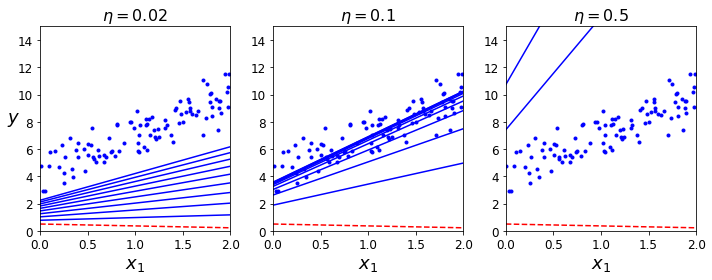

In [26]:
np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

plt.figure(figsize=(10,4))
plt.subplot(131); plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)
plt.subplot(133); plot_gradient_descent(theta, eta=0.5)

save_fig("gradient_descent_plot")
plt.show()

### Stochastic Gradient Descent
- runs at one random instance at a time, less general, gradient will bounce up and down, but decreasing on average
- eventually it will go to minimum, but will keep bouncing around it, so when iteration are done, it will be not optimal but close to it
- with an irregular cost function the jumpting may actually help, avoiding local min
- to slowdown bouncing around we can apply Learning Schedule to gradually reduce learning rate

In [15]:
theta_path_sgd = []
m = len(X_b)
np.random.seed(42)

Saving figure sgd_plot


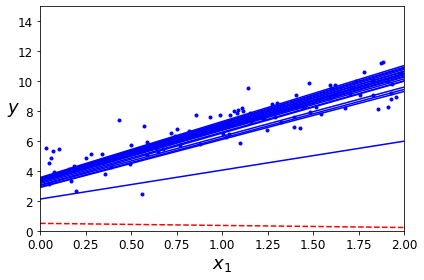

In [16]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]  # add x0 = 1 to each instance

n_epochs = 50
t0, t1 = 5, 50  # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1)  # random initialization

for epoch in range(n_epochs):
    for i in range(m):
        if epoch == 0 and i < 20:                    # not shown in the book
            y_predict = X_new_b.dot(theta)           # not shown
            style = "b-" if i > 0 else "r--"         # not shown
            plt.plot(X_new, y_predict, style)        # not shown
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
        theta_path_sgd.append(theta)                 # not shown

plt.plot(X, y, "b.")                                 # not shown
plt.xlabel("$x_1$", fontsize=18)                     # not shown
plt.ylabel("$y$", rotation=0, fontsize=18)           # not shown
plt.axis([0, 2, 0, 15])                              # not shown
save_fig("sgd_plot")                                 # not shown
plt.show()                                           # not shown

In [17]:
theta

array([[3.86446756],
       [3.1277065 ]])

Linear regression with SGD

In [20]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000
                    , tol=1e-3 # acceptable tolerance level to stop iterating
                    , penalty=None
                    , eta0=0.1 # starting learing rate, with a normal schedule applied
                    , random_state=42)
sgd_reg.fit(X, y.ravel())

print('results are close to normal equation again')
sgd_reg.intercept_, sgd_reg.coef_

results are close to normal equation again


(array([3.93125672]), array([3.16918173]))

#### Mini batch gradient descent
in between batch and stochastic - random small batches

In [21]:
theta_path_mgd = []

n_iterations = 50
minibatch_size = 20

np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

t0, t1 = 200, 1000
def learning_schedule(t):
    return t0 / (t + t1)

t = 0
for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, minibatch_size):
        t += 1
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(t)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)

In [22]:
theta

array([[3.93947713],
       [3.17291258]])

compare

In [27]:
theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

Saving figure gradient_descent_paths_plot


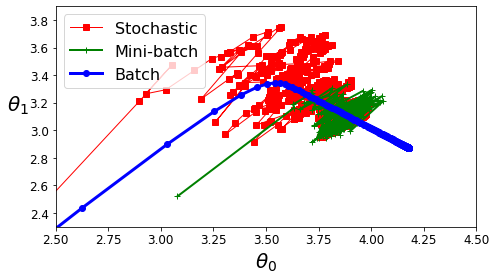

In [28]:
plt.figure(figsize=(7,4))
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], "r-s", linewidth=1, label="Stochastic")
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], "g-+", linewidth=2, label="Mini-batch")
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "b-o", linewidth=3, label="Batch")
plt.legend(loc="upper left", fontsize=16)
plt.xlabel(r"$\theta_0$", fontsize=20)
plt.ylabel(r"$\theta_1$   ", fontsize=20, rotation=0)
plt.axis([2.5, 4.5, 2.3, 3.9])
save_fig("gradient_descent_paths_plot")
plt.show()